---
title: 'Walkthroughs and Exercises for *Machine Learning for Data Analytics with Python*'  
author: "Dr. Chester Ismay"  
format:
  html:
    theme: flatly
    toc: true
    toc-floating: true 
engine: knitr  
---

In [1]:
#| include: false
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

# Expand width of console output
pd.set_option("display.width", 100)

# Display all outputs from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Intro: Getting Started with Machine Learning for Data-Driven Decisions

## Walkthrough #1: Setting Up the Python Environment for ML

If you haven't already installed Python, Jupyter, and the necessary packages, there are instructions on the course repo in the README to do so [here](https://github.com/ismayc/oreilly-data-analysis-with-python/blob/main/README.md). 

You can also install the packages directly in a Jupyter notebook with

In [2]:
#| eval: false
!pip install pandas seaborn matplotlib scikit-learn mlxtend

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

If you aren't able to do this on your machine, you may want to check out [Google Colab](https://colab.research.google.com/). It's a free service that allows you to run Jupyter notebooks in the cloud. 

<!--
Alternatively, I've set up some temporary notebooks on Binder [here](https://mybinder.org/v2/gh/ismayc/oreilly-fundamentals-of-statistics-with-python/main?urlpath=%2Fdoc%2Ftree%2Fexercises.ipynb) that you can work with online as well.
-->

Run the following code to check that each of the needed packages are installed. If you get an error, you may need to install the package(s) again.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [4]:
# Load dataset
telco_churn_raw = pd.read_csv('telco-customer-churn.csv')

## Exercise #1: Setting Up the Python Environment

By completing this exercise, you will be able to  

- Import necessary Python packages  
- Check for successful package loading  
- Load datasets into Python

Follow the instructions above in Walkthrough #1 to check for correct installation 
of necessary packages.

In [5]:
# Load dataset
marketing_campaign_raw = pd.read_csv('marketing_campaign.csv')

---

# Module 1: Data Understanding and Preprocessing for Machine Learning


## Walkthrough #2: Exploring and Preprocessing Data with Pandas & Seaborn

### Inspect a dataset using Pandas


In [6]:
# Inspect data structure
telco_churn_raw
telco_churn_raw.info()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ServiceCount,InternetScore,AvgServiceUsageScore,Churn
0,7590-VHVEG,Female,0,Yes,No,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,1,20,6.651318,No
1,5575-GNVDE,Male,0,No,No,34,1,No,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,3,20,12.794164,No
2,3668-QPYBK,Male,0,No,No,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,3,20,15.077513,Yes
3,7795-CFOCW,Male,0,No,No,45,0,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,3,20,17.299583,No
4,9237-HQITU,Female,0,No,No,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1,40,18.222739,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,1,Yes,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,6,20,24.677222,No
7039,2234-XADUH,Female,0,Yes,Yes,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,5,40,24.195642,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,1,20,NaN,No
7041,8361-LTMKD,Male,1,Yes,No,4,1,Yes,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,1,40,15.461278,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   object 
 2   SeniorCitizen         7043 non-null   int64  
 3   Partner               7043 non-null   object 
 4   Dependents            7043 non-null   object 
 5   tenure                7043 non-null   int64  
 6   PhoneService          7043 non-null   int64  
 7   MultipleLines         7043 non-null   object 
 8   InternetService       7043 non-null   object 
 9   OnlineSecurity        7043 non-null   int64  
 10  OnlineBackup          7043 non-null   int64  
 11  DeviceProtection      7043 non-null   int64  
 12  TechSupport           7043 non-null   int64  
 13  StreamingTV           7043 non-null   int64  
 14  StreamingMovies       7043 non-null   int64  
 15  Contract             

In [7]:
# Check for missing values
telco_churn_raw.isnull().sum()

# Check for duplicate rows
telco_churn_raw.duplicated().sum()

customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges          422
TotalCharges              0
ServiceCount              0
InternetScore             0
AvgServiceUsageScore    619
Churn                     0
dtype: int64

np.int64(0)

### Handle missing values and clean data

In [8]:
# Make a copy of the data to fix and clean
telco_churn = telco_churn_raw.copy()

# Handle missing values
telco_churn['MonthlyCharges'] = telco_churn['MonthlyCharges']\
  .fillna(telco_churn['MonthlyCharges']\
  .median())
telco_churn['AvgServiceUsageScore'] = telco_churn['AvgServiceUsageScore']\
  .fillna(telco_churn['AvgServiceUsageScore']\
  .median())
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7043 non-null   object 
 1   gender                7043 non-null   object 
 2   SeniorCitizen         7043 non-null   int64  
 3   Partner               7043 non-null   object 
 4   Dependents            7043 non-null   object 
 5   tenure                7043 non-null   int64  
 6   PhoneService          7043 non-null   int64  
 7   MultipleLines         7043 non-null   object 
 8   InternetService       7043 non-null   object 
 9   OnlineSecurity        7043 non-null   int64  
 10  OnlineBackup          7043 non-null   int64  
 11  DeviceProtection      7043 non-null   int64  
 12  TechSupport           7043 non-null   int64  
 13  StreamingTV           7043 non-null   int64  
 14  StreamingMovies       7043 non-null   int64  
 15  Contract             

In [9]:
# Standardize column formats (e.g., convert Yes/No to binary for a few columns)
telco_churn['SeniorCitizen'] = telco_churn['SeniorCitizen'].astype('category')
telco_churn['Churn'] = telco_churn['Churn'].map({'Yes': 1, 'No': 0})

In [10]:
# Summarize statistics
telco_churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,ServiceCount,InternetScore,AvgServiceUsageScore,Churn
count,7043,7043,7043.0,7043,7043,7043.000000,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000
unique,7043,2,2.0,2,2,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,3,2,4,NaN,6531,NaN,NaN,NaN,NaN
top,3186-AJIEK,Male,0.0,No,No,NaN,NaN,No,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,NaN,20.2,NaN,NaN,NaN,NaN
freq,1,3555,5901.0,3641,4933,NaN,NaN,3390,3096,NaN,NaN,NaN,NaN,NaN,NaN,3875,4171,2365,NaN,11,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,32.371149,0.903166,NaN,NaN,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,NaN,NaN,NaN,65.139287,NaN,2.941076,24.458327,16.776492,0.265370
std,NaN,NaN,NaN,NaN,NaN,24.559481,0.295752,NaN,NaN,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,NaN,NaN,NaN,29.224436,NaN,1.843899,15.577533,8.967244,0.441561
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,18.250000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,40.650000,NaN,1.000000,20.000000,10.347048,0.000000
50%,NaN,NaN,NaN,NaN,NaN,29.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,70.350000,NaN,3.000000,20.000000,17.647544,0.000000
75%,NaN,NaN,NaN,NaN,NaN,55.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,89.200000,NaN,4.000000,40.000000,23.221339,1.000000


### Create visualizations to identify key business trends

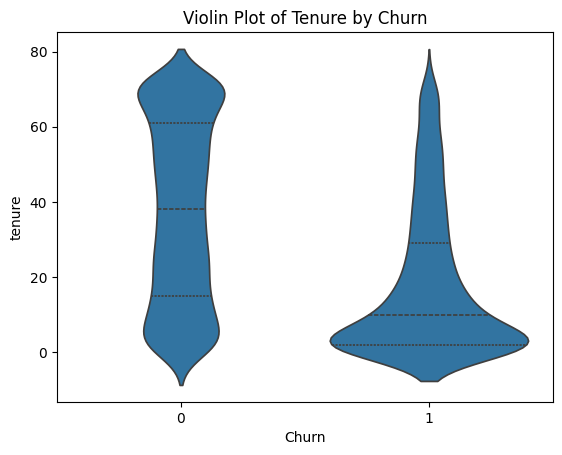

In [11]:
# Visualize distributions and relationships
plt.clf()
sns.violinplot(data=telco_churn, x='Churn', y='tenure', inner='quartile')
plt.title('Violin Plot of Tenure by Churn')
plt.show();

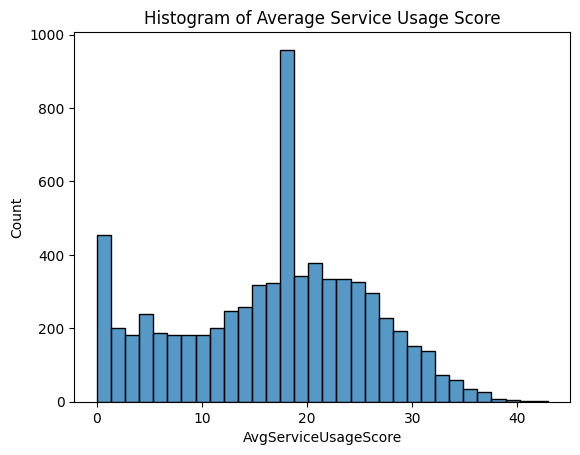

In [12]:
plt.clf()
sns.histplot(data=telco_churn, x='AvgServiceUsageScore')
plt.title('Histogram of Average Service Usage Score')
plt.show();

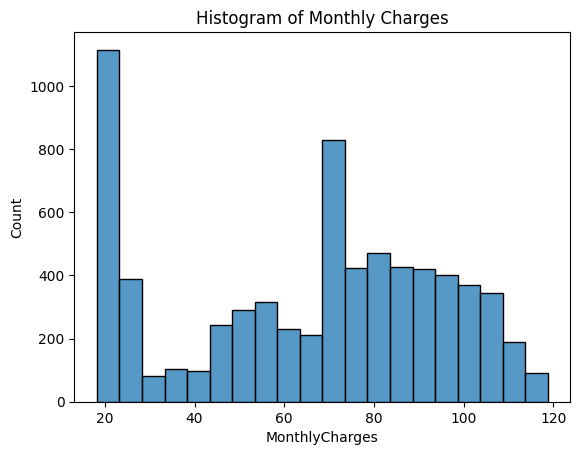

In [13]:
plt.clf()
sns.histplot(data=telco_churn, x='MonthlyCharges')
plt.title('Histogram of Monthly Charges')
plt.show();

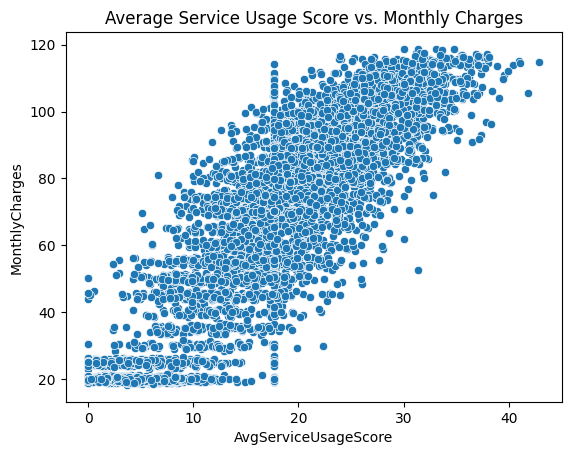

In [14]:
plt.clf()
sns.scatterplot(data=telco_churn, x='AvgServiceUsageScore', y='MonthlyCharges')
plt.title('Average Service Usage Score vs. Monthly Charges')
plt.show();

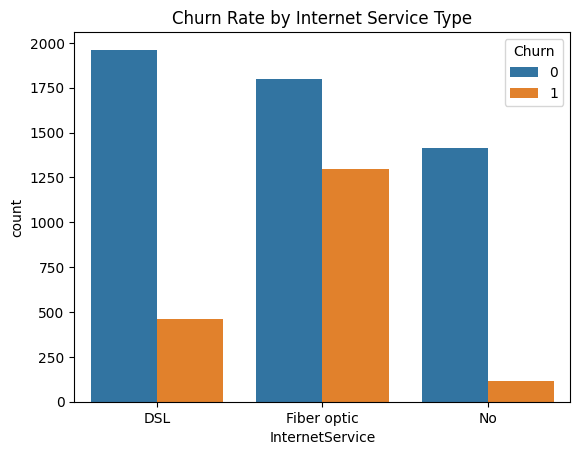

In [15]:
plt.clf()
sns.countplot(data=telco_churn, x='InternetService', hue='Churn')
plt.title('Churn Rate by Internet Service Type')
plt.show();

---



## Exercise #2: Exploring and Preprocessing Data with Pandas & Seaborn

### Inspect a dataset using Pandas

In [16]:
# Inspect data structure
marketing_campaign_raw
marketing_campaign_raw.info()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren,TotalSpent
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1617
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,27
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,776
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,53
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1,1341
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,3,444
2237,1981,Graduation,Divorced,NaN,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,0,1241
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,1,843


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               1994 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [17]:
# Check for missing values
marketing_campaign_raw.isnull().sum()

# Check for duplicate rows
marketing_campaign_raw.duplicated().sum()

Year_Birth               0
Education                0
Marital_Status           0
Income                 246
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Response                 0
TotalChildren            0
TotalSpent               0
dtype: int64

np.int64(146)

### Handle missing values and clean data

In [38]:
# Create a clean working copy
marketing_campaign = marketing_campaign_raw.copy()

# Handle missing values of Income
marketing_campaign['Income'] = marketing_campaign['Income']\
  .fillna(marketing_campaign['Income']\
  .median())

# Add new features
marketing_campaign["TotalChildren"] = marketing_campaign["Kidhome"] + marketing_campaign["Teenhome"]
marketing_campaign["TotalSpent"] = (
    marketing_campaign["MntWines"] + marketing_campaign["MntFruits"] +
    marketing_campaign["MntMeatProducts"] + marketing_campaign["MntFishProducts"] +
    marketing_campaign["MntSweetProducts"] + marketing_campaign["MntGoldProds"]
)

# Convert to datetime
marketing_campaign["Dt_Customer"] = pd.to_datetime(marketing_campaign["Dt_Customer"], errors='coerce')
marketing_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2240 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-nul

In [39]:
# Not necessary but maybe worth showing

# Drop duplicated rows (keep the first occurrence)
marketing_campaign = marketing_campaign_raw.drop_duplicates()

# Confirm duplicates are gone
marketing_campaign.duplicated().sum()
marketing_campaign.info()

np.int64(0)

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2094 non-null   int64  
 1   Education            2094 non-null   object 
 2   Marital_Status       2094 non-null   object 
 3   Income               1849 non-null   float64
 4   Kidhome              2094 non-null   int64  
 5   Teenhome             2094 non-null   int64  
 6   Dt_Customer          2094 non-null   object 
 7   Recency              2094 non-null   int64  
 8   MntWines             2094 non-null   int64  
 9   MntFruits            2094 non-null   int64  
 10  MntMeatProducts      2094 non-null   int64  
 11  MntFishProducts      2094 non-null   int64  
 12  MntSweetProducts     2094 non-null   int64  
 13  MntGoldProds         2094 non-null   int64  
 14  NumDealsPurchases    2094 non-null   int64  
 15  NumWebPurchases      2094 non-null   int64 

In [20]:
# Summarize structure
marketing_campaign.describe(include='all')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalChildren,TotalSpent
count,2094.000000,2094,2094,1849.000000,2094.000000,2094.000000,2094,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
unique,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Graduation,Married,NaN,NaN,NaN,2014-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1049,810,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.793696,NaN,NaN,52208.673337,0.446036,0.507163,NaN,49.023878,303.866762,26.385387,168.120344,37.406399,27.139924,44.001910,2.337631,4.099331,2.664279,5.776027,5.319962,0.073543,0.075454,0.071633,0.065903,0.012894,0.009551,0.151385,0.953200,606.920726
std,11.963691,NaN,NaN,26031.178751,0.536931,0.546628,NaN,29.002634,335.897057,39.831669,228.083806,54.691364,41.602090,52.328924,1.939148,2.789077,2.934464,3.240330,2.440464,0.261089,0.264185,0.257941,0.248171,0.112844,0.097285,0.358509,0.749395,602.576082
min,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,1959.000000,NaN,NaN,35196.000000,0.000000,0.000000,NaN,24.000000,23.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000
50%,1970.000000,NaN,NaN,51250.000000,0.000000,0.000000,NaN,49.000000,175.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,396.500000
75%,1977.000000,NaN,NaN,68274.000000,1.000000,1.000000,NaN,74.000000,504.000000,33.000000,230.750000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1047.750000


### Create visualizations to identify key business trends

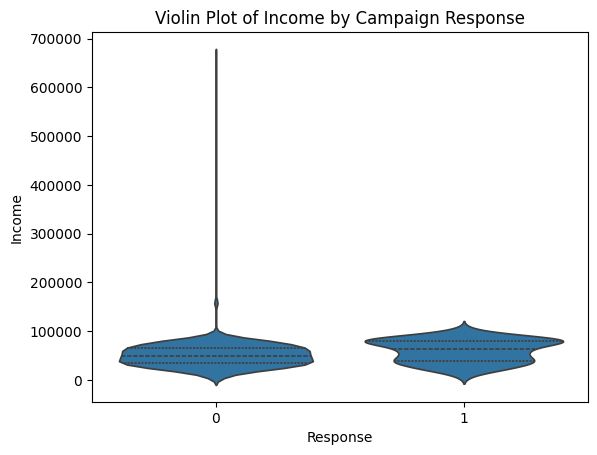

In [21]:
plt.close('all')
plt.clf()
sns.violinplot(data=marketing_campaign, x='Response', y='Income', inner='quartile')
plt.title('Violin Plot of Income by Campaign Response')
plt.show();

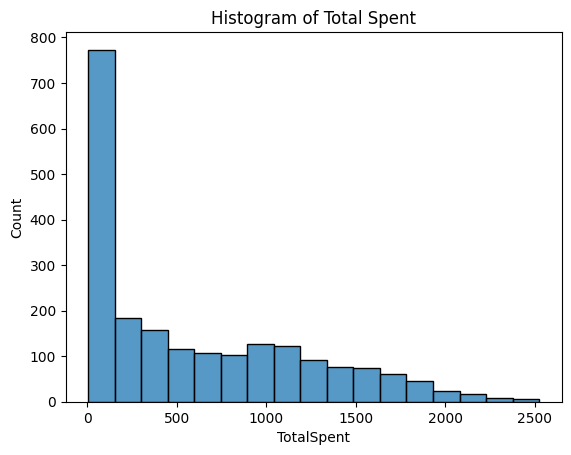

In [22]:
plt.close('all')
plt.clf()
sns.histplot(data=marketing_campaign, x='TotalSpent')
plt.title('Histogram of Total Spent')
plt.show();

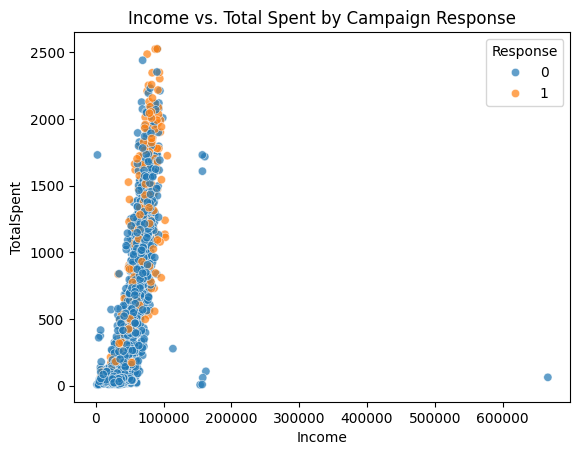

In [23]:
plt.close('all')
plt.clf()
sns.scatterplot(data=marketing_campaign, x='Income', y='TotalSpent', hue='Response', alpha=0.7)
plt.title('Income vs. Total Spent by Campaign Response')
plt.show();

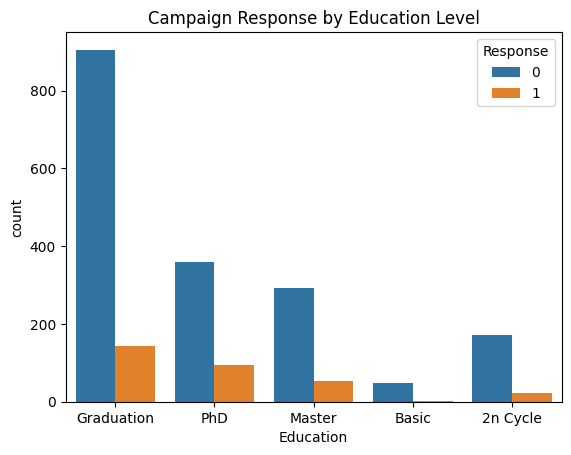

In [24]:
plt.close('all')
plt.clf()
sns.countplot(data=marketing_campaign, x='Education', hue='Response')
plt.title('Campaign Response by Education Level')
#plt.xticks(rotation=30)
plt.show();

---


# Module 2: Supervised Learning for Business Decisions

## Walkthrough #3: Build a Regression Model for Pricing Optimization

### Split the data into training and validation sets

In [25]:
X = telco_churn[['AvgServiceUsageScore']]  # predictor
y = telco_churn['MonthlyCharges']          # target

# Best practice when working with linear models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
  X_scaled, y, test_size=0.2, random_state=2025
)

### Train a linear regression model

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"Intercept: {lr.intercept_:.2f}")
print(f"Coefficient (usage_scaled → price): {lr.coef_[0]:.2f}")

LinearRegression()

Intercept: 64.88
Coefficient (usage_scaled → price): 25.85


### Evaluate model performance on the validation set

In [27]:
y_pred = lr.predict(X_val)

r2 = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R-squared: 0.80
Mean Absolute Error: 8.25


---

## Exercise #3: Build a Regression Model for Pricing Optimization

### Split the data into training and validation sets

In [35]:
# Step 1: Drop missing values from relevant columns only
clean_df = marketing_campaign[['Income', 'TotalSpent']].dropna()

# Step 2: Separate predictors and target
X_m = clean_df[['Income']]
y_m = clean_df['TotalSpent']

# Predictor and target
#X_m = marketing_campaign[['Income']]  # predictor
#y_m = marketing_campaign['TotalSpent'] # target

y_m = y_m.reset_index(drop=True)

# Standardize the predictor
scaler_m = StandardScaler()
X_m_scaled = scaler_m.fit_transform(X_m)

# Train-test split
X_m_train, X_m_val, y_m_train, y_m_val = train_test_split(
    X_m_scaled, y_m, test_size=0.2, random_state=2025
)

In [37]:
marketing_campaign[['Income', 'TotalSpent']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2239
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      1849 non-null   float64
 1   TotalSpent  2094 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 49.1 KB


### Train a linear regression model

In [34]:
# Step 1: Drop missing values from relevant columns only
clean_df = marketing_campaign[['Income', 'TotalSpent']].dropna()

# Step 2: Separate predictors and target
X_m = clean_df[['Income']]
y_m = clean_df['TotalSpent']

# Step 3: Standardize predictor
scaler_m = StandardScaler()
X_m_scaled = scaler_m.fit_transform(X_m)

# Step 4: Train-test split (with everything aligned!)
from sklearn.model_selection import train_test_split
X_m_train, X_m_val, y_m_train, y_m_val = train_test_split(
    X_m_scaled, y_m.to_numpy(), test_size=0.2, random_state=2025
)

# Step 5: Fit linear regression
from sklearn.linear_model import LinearRegression
lr_m = LinearRegression()
lr_m.fit(X_m_train, y_m_train)


LinearRegression()

In [36]:
lr_m = LinearRegression()
lr_m.fit(X_m_train, y_m_train)

print(f"Intercept: {lr_m.intercept_:.2f}")
print(f"Coefficient (Income_scaled → TotalSpent): {lr_m.coef_[0]:.2f}")

LinearRegression()

Intercept: 600.56
Coefficient (Income_scaled → TotalSpent): 353.33


### Evaluate model performance on the validation set

In [ ]:
y_m_pred = lr_m.predict(X_m_val)

r2_m = r2_score(y_m_val, y_m_pred)
mae_m = mean_absolute_error(y_m_val, y_m_pred)

print(f"R-squared: {r2_m:.2f}")
print(f"Mean Absolute Error: {mae_m:.2f}")

---

## Walkthrough #4: Implement a Classification Model for Customer Churn

### Split the data into training and validation sets

In [ ]:
# Select relevant features
features = ['tenure', 'SeniorCitizen', 'ServiceCount', 'InternetScore', 'AvgServiceUsageScore']
X = telco_churn[features]
y = telco_churn['Churn']

# Scaling is not as important for tree-based models since they are not sensitive to
# one feature having a larger scale than another

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

### Train a Random Forest classification model

In [ ]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=2025)
clf.fit(X_train, y_train)

### Evaluate model performance on the validation set

In [ ]:
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

cm = confusion_matrix(y_test, y_pred)

labels = ['No Churn', 'Churn']
cm_telco_churn = pd.DataFrame(cm, index=labels, columns=labels)

print("\nConfusion Matrix (formatted):")
print(cm_telco_churn)

---

## Exercise #4: Implement a Classification Model for Customer Churn

### Split the data into training and validation sets

In [ ]:
# Select relevant features
features_m = ['Income', 'TotalSpent', 'TotalChildren']
X_m_class = marketing_campaign[features_m]
y_m_class = marketing_campaign['Response']

# Split into training and validation sets
X_m_train_class, X_m_val_class, y_m_train_class, y_m_val_class = train_test_split(
    X_m_class, y_m_class, test_size=0.2, random_state=2025
)

### Train a Random Forest classification model

In [ ]:
# Train Random Forest classifier
clf_m = RandomForestClassifier(n_estimators=100, random_state=2025)
clf_m.fit(X_m_train_class, y_m_train_class)

### Evaluate model performance on the validation set

In [ ]:
y_m_pred_class = clf_m.predict(X_m_val_class)

print(f"Accuracy: {accuracy_score(y_m_val_class, y_m_pred_class):.2f}")
print(f"Precision: {precision_score(y_m_val_class, y_m_pred_class):.2f}")
print(f"Recall: {recall_score(y_m_val_class, y_m_pred_class):.2f}")

labels = ['No Response', 'Response']
cm_marketing_response = pd.DataFrame(confusion_matrix(y_m_val_class, y_m_pred_class), 
                                     index=labels, columns=labels)

print("\nConfusion Matrix (formatted):")
print(cm_marketing_response)

---

# Module 3: Unsupervised Learning and Pattern Discovery in Business

## Walkthrough #5: Exploring K-Means Clustering for Customer Segmentation

### Apply K-Means clustering to segment customers

In [ ]:
# Select relevant features
telco_churn['ContractType'] = telco_churn['Contract'].map({
    'Month-to-month': 0, 'One year': 1, 'Two year': 2
})
features = ['tenure', 'ServiceCount', 'AvgServiceUsageScore', 'MonthlyCharges', 'InternetScore', 'ContractType']
X = telco_churn[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Determine the optimal number of clusters using the Elbow Method

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=2025)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.clf()
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Verify using the silhouette score (optional but recommended)

In [ ]:
# Evaluate silhouette scores for k=3 to k=6
silhouette_scores = {}

for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=2025)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score

silhouette_scores

### Fit K-means and assign cluster labels to each customer

In [ ]:
# Let's assume the elbow suggested k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=2025)
telco_churn['Cluster'] = kmeans.fit_predict(X_scaled)

### Visualize customer segments using a 2D plot

In [ ]:
plt.clf()
# Visualize clusters in 2D space (using tenure and MonthlyCharges)
sns.scatterplot(data=telco_churn,  x='tenure', y='AvgServiceUsageScore', hue='Cluster', palette='viridis')
plt.title('Customer Segments via K-Means')
plt.show();

---

## Exercise #5: Exploring K-Means Clustering for Customer Segmentation

### Apply K-Means clustering to segment customers

In [ ]:
# Select relevant features
features_cluster = ['Income', 'TotalSpent', 'TotalChildren']
X_cluster = marketing_campaign[features_cluster]

# Standardize features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

### Determine the optimal number of clusters using the Elbow Method

In [ ]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=2025)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

plt.clf()
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show();

### Verify using the silhouette score (optional but recommended)

In [ ]:
silhouette_scores = {}

for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, random_state=2025)
    labels = kmeans.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    silhouette_scores[k] = score

silhouette_scores

### Fit K-means and assign cluster labels to each customer

In [ ]:
# Assume optimal k is 5 (can be adjusted based on elbow or silhouette)
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=2025)
marketing_campaign['Cluster'] = kmeans_final.fit_predict(X_cluster_scaled)

### Visualize customer segments using a 2D plot

In [ ]:
import matplotlib.ticker as ticker
plt.clf()
sns.scatterplot(data=marketing_campaign, x='TotalChildren', y='TotalSpent', hue='Cluster', palette='viridis')
plt.title('Customer Segments via K-Means Clustering')

# Set x-axis to integer ticks only
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show();

---

## Walkthrough #6: Market Basket Analysis with Apriori Algorithm

### Prepare transactional data (services as items)

In [ ]:
# Selecting binary service columns to act like "products"
service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PhoneService'
]

# Convert service columns to boolean (preference of apriori() function)
telco_churn_basket = telco_churn[service_cols].astype(bool)
telco_churn_basket

### Apply the Apriori algorithm to identify frequent itemsets

In [ ]:
frequent_itemsets = apriori(telco_churn_basket, min_support=0.2, use_colnames=True)
frequent_itemsets

### Generate association rules from frequent itemsets

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules

### Interpret insights

🔵 Key Metrics

Support:  
Fraction of all customers who have this combination of services.  
Example: 0.275 means 27.5% of customers bought that combination.

Confidence:  
Given the antecedent, how often does the consequent also occur?  
Example: Confidence of 0.71 means 71% of customers with the antecedent also have the consequent.  

Lift:  
Measures how much more likely the consequent is given the antecedent compared to random chance.

Lift > 1 → Positive association.   
Lift = 1 → Independent.  
Lift < 1 → Negative association. 

🧩 Interpretation of Key Rules. 
Rule 6. 
If customers have StreamingTV, they also likely have StreamingMovies

Confidence = 0.71. 
71% of customers who subscribe to StreamingTV also have StreamingMovies.

Lift = 1.84. 
This is 84% more likely than random → strong association.

📌 Business insight:  
These services are good cross-sell opportunities. A bundled "Entertainment Pack" could increase uptake.

Rule 2. 
If customers have DeviceProtection, they also likely have StreamingTV

Confidence = 0.65. 
65% of DeviceProtection users also subscribe to StreamingTV.

Lift = 1.68. 
This is a significant positive relationship, suggesting that people buying protection plans may also value entertainment services.

📌 Business insight:  
Consider cross-promoting entertainment bundles during device protection sales.

Rule 10. 
If customers have DeviceProtection + PhoneService, they likely also have StreamingMovies

Confidence = 0.67. 
67% of these bundled customers also purchase StreamingMovies.

Lift = 1.71. 
Shows a strong cross-sell relationship.

📌 Business insight:  
Customers with both DeviceProtection and PhoneService are strong candidates for targeted movie streaming promotions.

General pattern. 
StreamingTV ↔ StreamingMovies repeatedly show strong relationships with lift > 1.8.  
PhoneService often appears as a base product with high confidence but lower lift (~0.9) — this is expected since most customers (90%) already have PhoneService.

🔔 Summary.  
Look for high lift AND high confidence.  
Focus marketing on bundles like:  
  StreamingTV + StreamingMovies packages.  
  Upselling StreamingMovies to customers with DeviceProtection + PhoneService.

---

## Exercise #6: Market Basket Analysis with Apriori Algorithm

### Prepare transactional data (product categories as items)

In [ ]:
# Select binary columns representing product purchases
product_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Convert product columns to binary: 1 if any amount was spent, else 0
basket = marketing_campaign[product_cols].applymap(lambda x: 1 if x > 0 else 0)

# Rename columns for cleaner output
basket.columns = [
    'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'
]

basket = basket.astype(bool)
basket.head()

---

### Apply the Apriori algorithm to identify frequent itemsets

In [ ]:
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False)

---

### Generate association rules from frequent itemsets

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
rules = rules.sort_values(by='lift', ascending=False)
rules.reset_index(drop=True, inplace=True)
rules

---

### Interpret insights

Here are three example rules from the output:

In [ ]:
# Show top 3 rules for manual interpretation
rules.head(3)

🔍 Key Metrics Recap:

- **Support**: How often the itemset appears in the dataset  
- **Confidence**: Likelihood that the consequent is purchased when the antecedent is  
- **Lift**: Strength of the association  
  - **Lift > 1** → Positive association  
  - **Lift = 1** → No association (independent)  
  - **Lift < 1** → Negative association

🧩 Example Interpretations Based on Top 3 Rules:


**Rule 1**  
If customers purchase **Wines, Meat, Sweets, and Gold**, they also likely purchase **Fish and Fruits**

- **Confidence = 0.82** → 82% of customers who buy Wines, Meat, Sweets, and Gold also buy Fish and Fruits  
- **Lift = 1.11** → Slightly stronger than random chance (11% more likely)  
📌 **Business Insight**: Customers who spend across luxury (Gold), indulgent (Sweets), and staple (Meat, Wine) categories are good targets for bundled offers that include **Fish and Fruits** as healthy complements.


**Rule 2**  
If customers purchase **Wines, Sweets, and Gold**, they also likely purchase **Fish, Meat, and Fruits**

- **Confidence = 0.82**  
- **Lift = 1.11**  
📌 **Business Insight**: This pattern suggests customers with a taste for fine items (Gold + Wines + Sweets) are highly likely to also buy a variety of essentials (Fish, Meat, Fruits). Consider **creating gourmet bundles** featuring these combinations.


**Rule 3**  
If customers purchase **Fish, Meat, and Fruits**, they also likely purchase **Wines, Sweets, and Gold**

- **Confidence = 0.88** → Very strong rule  
- **Lift = 1.11**  
📌 **Business Insight**: Customers who stock up on protein and fresh produce often also spend on indulgent and luxury products. **Upsell Wines, Sweets, and Gold items** to shoppers purchasing staples — strong potential for increasing average order value.

🔔 Summary:

Focus on rules with:
- **High confidence**: Indicates consistent purchasing behavior  
- **Lift > 1**: Indicates a real association beyond chance  

💡 Marketing Strategy Ideas:  
- Target luxury buyers of **Wines + Sweets + Gold** with healthy add-ons like **Fish + Fruits**  
- Promote **"Gourmet Essentials Packs"** that include **Fish, Meat, Fruits, and Wine**  
- Use Rule 3 to **upsell luxury products** to customers starting with staple categories  

---

# Module 4: Implementing and Evaluating ML Models

## Walkthrough #7: Exploring Cross-Validation for Model Evaluation

### Split data into training and validation sets

In [ ]:
# Features and target
X = telco_churn[['AvgServiceUsageScore', 'tenure', 'MonthlyCharges']]
y = telco_churn['Churn']

# Scale the features since logistic regression is a linear model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2025)

### Train a classification model using logistic regression

In [ ]:
# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

### Apply k-fold cross-validation to evaluate model performance

In [ ]:
# Cross-validate with multiple metrics
cv_results = cross_validate(
    logreg, 
    X_train, 
    y_train, 
    cv=5, 
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

### Compare metrics across folds

In [ ]:
# Average performance across folds
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    print(f"{metric.split('_')[1].capitalize()}: {cv_results[metric].mean():.3f} ± {cv_results[metric].std():.3f}")

📝 Interpretation
Accuracy → Overall correctness of predictions

Precision → How many predicted churns were actual churns

Recall → How many churns were correctly identified

F1-Score → Balances precision & recall

Cross-validation ensures that your model generalizes better to unseen data by reducing the risk of overfitting on a single split.

---

## Exercise #7: Exploring Cross-Validation for Model Evaluation

### Split data into training and validation sets

In [ ]:
# Features and target
X_m = marketing_campaign[['Income', 'TotalSpent', 'TotalChildren']]
y_m = marketing_campaign['Response']

# Scale features
scaler = StandardScaler()
X_m_scaled = scaler.fit_transform(X_m)

# Train-test split
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(
    X_m_scaled, y_m, test_size=0.2, random_state=2025
)

### Train a classification model using logistic regression

In [ ]:
# Initialize logistic regression model
logreg_m = LogisticRegression(max_iter=1000, solver='liblinear')

### Apply k-fold cross-validation to evaluate model performance

In [ ]:
# 5-fold cross-validation with multiple metrics
cv_results_m = cross_validate(
    logreg_m, 
    X_m_train, 
    y_m_train, 
    cv=5, 
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

### Compare metrics across folds

In [ ]:
# Average performance across folds
for metric in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
    print(f"{metric.split('_')[1].capitalize()}: {cv_results_m[metric].mean():.3f} ± {cv_results_m[metric].std():.3f}")

📝 Interpretation
Accuracy → Overall correctness of predictions

Precision → How many predicted responders were actual responders

Recall → How many actual responders were correctly identified

F1-Score → Harmonic mean of precision and recall

---

## Walkthrough #8: Hyperparameter Tuning with Grid Search

### Train a Random Forest classifier

In [ ]:
# Features and target
X = telco_churn[['AvgServiceUsageScore', 'tenure', 'MonthlyCharges']]
y = telco_churn['Churn']

# Initialize Random Forest
rf = RandomForestClassifier(random_state=2025)

### Apply grid search to find optimal hyperparameters

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Run grid search
grid_search.fit(X, y)

### Evaluate model improvement using accuracy and recall

In [ ]:
# Predict using the best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X)

# Evaluate
print(f"Best Accuracy: {accuracy_score(y, y_pred):.3f}")
print(f"Best Recall: {recall_score(y, y_pred):.3f}")

### Interpret the best hyperparameter combination

In [ ]:
print("Best Parameters Found:", grid_search.best_params_)

---

## Exercise #8: Hyperparameter Tuning with Grid Search

### Train a Random Forest classifier

In [ ]:
# Features and target
X_m = marketing_campaign[['Income', 'TotalSpent', 'TotalChildren']]
y_m = marketing_campaign['Response']

# Initialize Random Forest
rf_m = RandomForestClassifier(random_state=2025)

### Apply grid search to find optimal hyperparameters

In [ ]:
# Define the hyperparameter grid
param_grid_m = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV setup
grid_search_m = GridSearchCV(
    estimator=rf_m,
    param_grid=param_grid_m,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)

# Run grid search
grid_search_m.fit(X_m, y_m)

### Evaluate model improvement using accuracy and recall

In [ ]:
# Predict using the best model
best_rf_m = grid_search_m.best_estimator_
y_m_pred = best_rf_m.predict(X_m)

# Evaluate
print(f"Best Accuracy: {accuracy_score(y_m, y_m_pred):.3f}")
print(f"Best Recall: {recall_score(y_m, y_m_pred):.3f}")

### Interpret the best hyperparameter combination

In [ ]:
print("Best Parameters Found:", grid_search_m.best_params_)